<a href="https://colab.research.google.com/github/pradeep-isawasan/AnscombeQuartet/blob/main/AnscombeQuartet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Libraries

In [32]:
import numpy as np
import pandas as pd
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt

#Introduction

It was constructed in 1973 by statistician [Francis Anscombe](https://en.wikipedia.org/wiki/Frank_Anscombe) to illustrate the importance of plotting the graphs before analyzing and model building, and the effect of other observations such as outliers on statistical properties.

# Dataset

Anscombe's quartet comprises four data sets with each dataset consists of eleven (x,y) points.

# Basic Statistics
## Dataset 1

In [19]:
q1 = pd.read_csv("https://raw.githubusercontent.com/pradeep-isawasan/AnscombeQuartet/main/Dataset1.csv")
# view dataset
q1

,x,y
0,10,8.04
1,8,6.95
2,13,7.58
3,9,8.81
4,11,8.33
5,14,9.96
6,6,7.24
7,4,4.26
8,12,10.84
9,7,4.82


In [3]:
#find descriptive statistics
q1.describe()

,x,y
count,11.000000,11.000000
mean,9.000000,7.500909
std,3.316625,2.031568
min,4.000000,4.260000
25%,6.500000,6.315000
50%,9.000000,7.580000
75%,11.500000,8.570000
max,14.000000,10.840000


## Dataset 2

In [4]:
q2 = pd.read_csv("https://raw.githubusercontent.com/pradeep-isawasan/AnscombeQuartet/main/Dataset2.csv")

q2

,x,y
0,10,9.14
1,8,8.14
2,13,8.74
3,9,8.77
4,11,9.26
5,14,8.10
6,6,6.13
7,4,3.10
8,12,9.13
9,7,7.26


In [5]:
q2.describe()

,x,y
count,11.000000,11.000000
mean,9.000000,7.500909
std,3.316625,2.031657
min,4.000000,3.100000
25%,6.500000,6.695000
50%,9.000000,8.140000
75%,11.500000,8.950000
max,14.000000,9.260000


## Dataset 1,2,3,4

Now lets analyse all the 4 datasets and compare their respective statistical properties.  

In [14]:
q3 = pd.read_csv("https://raw.githubusercontent.com/pradeep-isawasan/AnscombeQuartet/main/Dataset3.csv")
q4 = pd.read_csv("https://raw.githubusercontent.com/pradeep-isawasan/AnscombeQuartet/main/Dataset4.csv")


# mean for x in q1, q2, q3, q4
meanx1 = q1['x'].mean()
meanx2 = q2['x'].mean()
meanx3 = q3['x'].mean()
meanx4 = q4['x'].mean()

# mean for y in q1, q2, q3, q4
meany1 = q1['y'].mean()
meany2 = q2['y'].mean()
meany3 = q3['y'].mean()
meany4 = q4['y'].mean()

# standard deviation, sd for x in q1, q2, q3, q4
sdx1 = q1['x'].std()
sdx2 = q2['x'].std()
sdx3 = q3['x'].std()
sdx4 = q4['x'].std()

# standard deviation, sd for y in q1, q2, q3, q4
sdy1 = q1['y'].std()
sdy2 = q2['y'].std()
sdy3 = q3['y'].std()
sdy4 = q4['y'].std()


In [15]:
# create table for comparison

d = {
    'Parameter': ['Mean(x)', 'Mean(y)', 'SD(x)', 'SD(y)'],
     'Dataset 1': [meanx1, meany1, sdx1, sdy1],
     'Dataset 2': [meanx2, meany2, sdx2, sdy2],
     'Dataset 3': [meanx3, meany3, sdx3, sdy3],
     'Dataset 4': [meanx4, meany4, sdx4, sdy4]
     }

df = pd.DataFrame(d)
df

,Parameter,Dataset 1,Dataset 2,Dataset 3,Dataset 4
0,Mean(x),9.000000,9.000000,9.000000,9.000000
1,Mean(y),7.500909,7.500909,7.500000,7.500909
2,SD(x),3.316625,3.316625,3.316625,3.316625
3,SD(y),2.031568,2.031657,2.030424,2.030579


# Linear Relationship
## Dataset 1

[Pearson correlation coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) is a measure of linear correlation between two sets of data. For example, if we are interested to know whether there is a relationship between the height and weight, a correlation coefficient can be calculated to answer this question. The coefficient’s value ranges between -1.0 and 1.0. A coefficient of -1.0 shows a perfect negative correlation and 1.0 a perfect positive correlation. A coefficient of 0.0 means that there is no relationship between the two variables. 

Correlation quantifies the strength of the linear relationship between two variables, whereas linearr regression expresses the relationship in the form of an linear equation. Anscombe Quartet demonstrate how high correlation value, does not always mean the data is linearly separable.  



In [74]:
p1,_ = pearsonr(q1['x'], q1['y'])
p2,_ = pearsonr(q2['x'], q2['y'])
p3,_ = pearsonr(q3['x'], q3['y'])
p4,_ = pearsonr(q4['x'], q4['y'])


In [75]:
d = {
    'Parameter': ['cor(x,y)'],
     'Dataset 1': [p1],
     'Dataset 2': [p2],
     'Dataset 3': [p3],
     'Dataset 4': [p4]
     }

df = pd.DataFrame(d)
df

,Parameter,Dataset 1,Dataset 2,Dataset 3,Dataset 4
0,"cor(x,y)",0.816421,0.816237,0.816287,0.816521


Note that the statistical properties for all these four datasets are approximately similar.

# Data Visualization
## Dataset 1

Scatterplot is a type of plot to display values for typically two variables for a set of data. It is very useful to explore the relationship between these two variables.

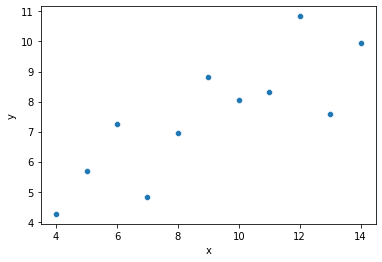

In [53]:
#create scatter plot for Dataset 1
sns.scatterplot(data=q1, x='x', y='y')

So now lets visualize the quartet.

[Text(0.5, 1.0, 'Dataset 4')]

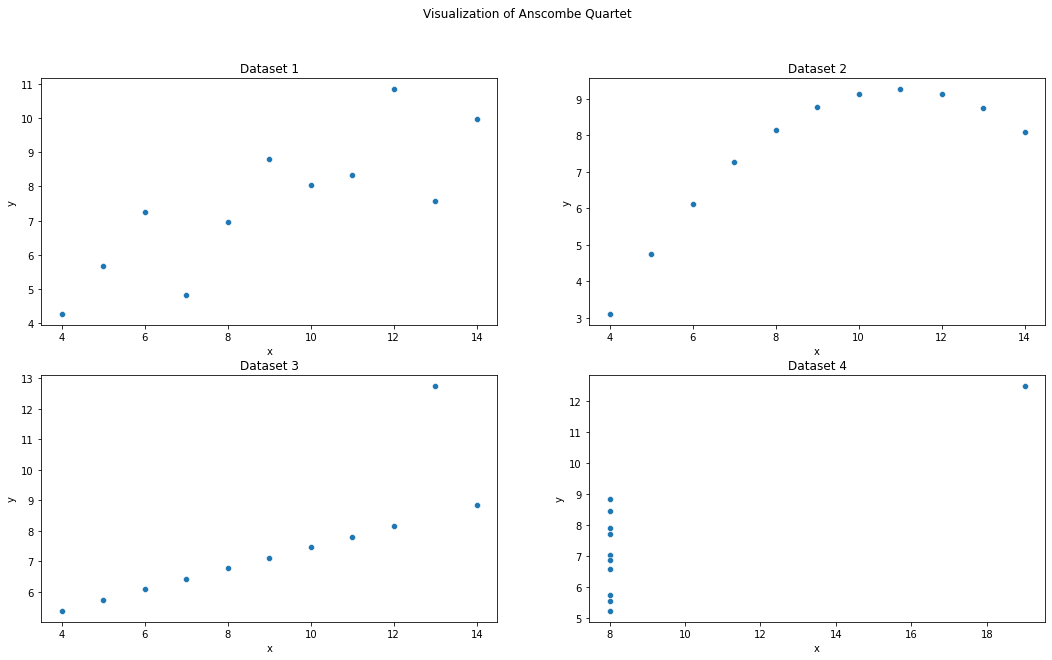

In [61]:
#create scatter plot for Dataset 1

fig, axes = plt.subplots(2, 2, figsize=(18, 10))

fig.suptitle('Visualization of Anscombe Quartet')

sns.scatterplot(ax=axes[0, 0], data=q1, x='x', y='y').set(title='Dataset 1')
sns.scatterplot(ax=axes[0, 1], data=q2, x='x', y='y').set(title='Dataset 2')
sns.scatterplot(ax=axes[1, 0], data=q3, x='x', y='y').set(title='Dataset 3')
sns.scatterplot(ax=axes[1, 1], data=q4, x='x', y='y').set(title='Dataset 4')

#Discussion

Anscombe Quartet demonstrate the importance of visualising the data before applying various algorithms for model building. It help to identify the anomalies present in the data like outliers or linearity of the data.